# Covid 19 Data Analysis 

* **My Python version is 3.9.9** 

## Importing Required Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Url request
import requests

#For model evaluation
from sklearn import metrics

#Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

#Double Exponential Smoothing and Holt Wint
from statsmodels.tsa.api import ExponentialSmoothing,Holt

#For 
from sklearn.model_selection import ParameterGrid

#Timer 
from timeit import default_timer as timer

## Evaluation Metrics 
* Mean Square Error
* Root Mean Square Error
* Mean Absolute Error
* Mean Absolute Percentage Error
* R Squared Score


In [2]:
def timseries_evaluation_metrics_func(y_true,y_pred):
    def mean_absolute_percentage_error(y_true,y_pred):
        y_true,y_pred = np.array(y_true),np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true))*100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true=y_true,y_pred=y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true=y_true,y_pred=y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true=y_true,y_pred=y_pred)}',end='\n\n')

## Getting Time Series Data from the API

In [3]:
def get_data():
  url = "https://api.covid19india.org/csv/latest/case_time_series.csv"
  req = requests.get(url)
  url_content = req.content
  csv_file  = open("covid_time_series.csv","wb")
  csv_file.write(url_content)
  csv_file.close()

In [4]:
data_doc = 'covid_time_series.csv'
if not os.path.isfile(data_doc):
    get_data()

Downloading Data if it is not present in the current working directory(cwd)

## Data Preparation

In [5]:
covid_data = pd.read_csv(data_doc,parse_dates=True,index_col=['Date'])

In [6]:
covid_data.head(20)

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,2020-01-30,1,1,0,0,0,0
2020-01-31,2020-01-31,0,1,0,0,0,0
2020-02-01,2020-02-01,0,1,0,0,0,0
2020-02-02,2020-02-02,1,2,0,0,0,0
2020-02-03,2020-02-03,1,3,0,0,0,0
2020-02-04,2020-02-04,0,3,0,0,0,0
2020-02-05,2020-02-05,0,3,0,0,0,0
2020-02-06,2020-02-06,0,3,0,0,0,0
2020-02-07,2020-02-07,0,3,0,0,0,0


As both **Date** column and **Date_YMD** are same.

Removing **Date_YMD** from the Data

In [7]:
covid_data.drop('Date_YMD',inplace=True,axis=1)

In [8]:
covid_data.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0


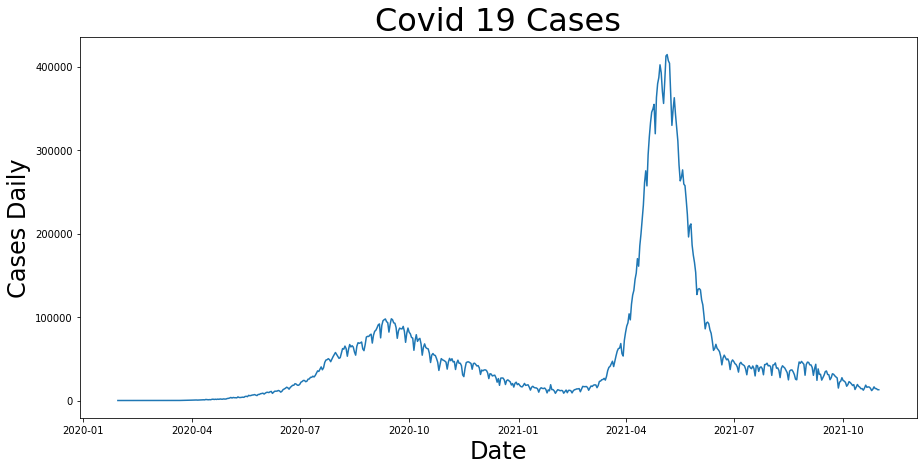

In [9]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_data["Daily Confirmed"])
plt.xlabel("Date",size=24)
plt.ylabel("Cases Daily",size=24)
plt.title("Covid 19 Cases",size=32)
plt.show()

In [10]:
print(covid_data['Daily Confirmed'][covid_data['Daily Confirmed'] == 0].count())
covid_data['Daily Confirmed'][covid_data['Daily Confirmed'] == 0]

29


Date
2020-01-31    0
2020-02-01    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
2020-02-08    0
2020-02-09    0
2020-02-10    0
2020-02-11    0
2020-02-12    0
2020-02-13    0
2020-02-14    0
2020-02-15    0
2020-02-16    0
2020-02-17    0
2020-02-18    0
2020-02-19    0
2020-02-20    0
2020-02-21    0
2020-02-22    0
2020-02-23    0
2020-02-24    0
2020-02-25    0
2020-02-26    0
2020-02-27    0
2020-02-28    0
2020-02-29    0
2020-03-01    0
Name: Daily Confirmed, dtype: int64

In [11]:
covid_data = covid_data[covid_data.index>"2020-03-01"]
covid_data.index.freq="D"

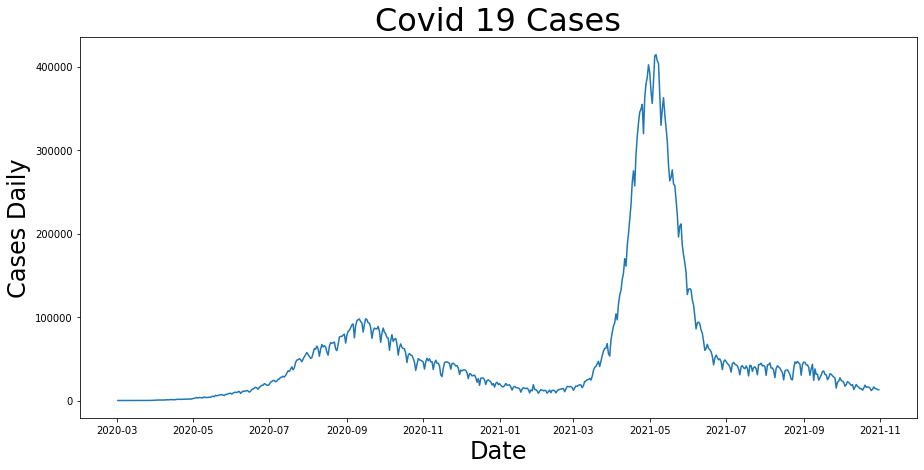

In [12]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(covid_data["Daily Confirmed"])
plt.xlabel("Date",size=24)
plt.ylabel("Cases Daily",size=24)
plt.title("Covid 19 Cases",size=32)
plt.show()

Removing the **Data upto 2020-03-01** as the number of cases doesnot have any significance on the rest of the data

## Train and Test Data
*  The **train** will have all the data expected for the **last 30 days**, and the **test** contains only the **last 30 days** to evaluate against **predictions.**

In [13]:
train = covid_data['Daily Confirmed'].iloc[:-30].copy()
test = covid_data['Daily Confirmed'].iloc[-30:].copy()

## Simple Exponential Smoothing

**Simple Exponential Smoothing** is used for time series prediction when the data particularly  does not follow any:

*  **Trend:** An upward or downward slope
*  **Seasonality:** Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.

**Simple Exponential Smoothing** works on weighted averages i.e. the average of the previous level and current observation. Largest weights are associated with the recent observations and the smallest weights are associated with the oldest observations.

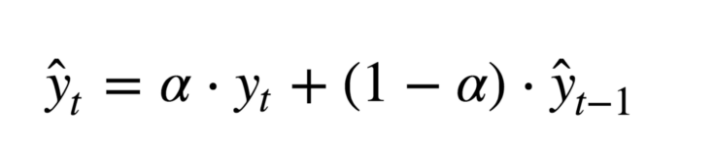

The decrease in weight is controlled by the smoothing parameter which is known as **𝜶(alpha)** here. **𝜶(alpha)** value can be **between 0 to 1**:

*  **𝜶(alpha)=0:** Means that forecast for future value is the average of  historical data.
*  **𝜶(alpha)=1:** Means that forecast for all future value is the value of the last observation    

From the above explanation of the **Simple Exponential Smoothing.**

**Hypothesis :** we assume that our data doesn't have any trend and seasonality

In [14]:
resu = []
temp_df = pd.DataFrame()
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(f'Fitting for smoothing level = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v = fit_v.forecast(30)
    timseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test,fcst_pred_v))
    df3 = {'smoothing parameter':i,'RMSE':rmse}
    temp_df = temp_df.append(df3,ignore_index=True)


Fitting for smoothing level = 0
Evaluation metric results:-
MSE is : 1758075726.2693775
MAE is : 41816.695158837625
RMSE is : 41929.41361704665
MAPE is : 264.6526902259644
R2 is : -185.24211761865223

Fitting for smoothing level = 0.1
Evaluation metric results:-
MSE is : 133205360.1970287
MAE is : 11125.000131901412
RMSE is : 11541.462654145214
MAPE is : 72.87013051793299
R2 is : -13.111137529833988

Fitting for smoothing level = 0.2
Evaluation metric results:-
MSE is : 84435147.4489086
MAE is : 8659.989329478782
RMSE is : 9188.859964593465
MAPE is : 57.46706851755602
R2 is : -7.944654901582091

Fitting for smoothing level = 0.3
Evaluation metric results:-
MSE is : 72376447.27210395
MAE is : 7933.266351880653
RMSE is : 8507.434823265115
MAPE is : 52.92600968323315
R2 is : -6.667213990989368

Fitting for smoothing level = 0.4
Evaluation metric results:-
MSE is : 70031169.05417977
MAE is : 7784.050153484209
RMSE is : 8368.462765298043
MAPE is : 51.99360551157513
R2 is : -6.41876645532037

Sorting based on the **RMSE values** of the models

In [15]:
temp_df.sort_values(by=['RMSE']).head(10)

,smoothing parameter,RMSE
10,1.0,7992.098131
9,0.9,8263.967299
4,0.4,8368.462765
5,0.5,8427.583086
8,0.8,8447.733743
3,0.3,8507.434823
6,0.6,8511.250370
7,0.7,8529.670252
2,0.2,9188.859965
1,0.1,11541.462654


Selecting **smoothing parameter** as **1.0** as it have the least **RMSE value**

In [16]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=1.0,optimized=True,use_brute=True)
fcst_ses_pred = fitSES.forecast(30)
timseries_evaluation_metrics_func(test,fcst_ses_pred)

Evaluation metric results:-
MSE is : 63873632.53333333
MAE is : 7377.933333333333
RMSE is : 7992.098130862341
MAPE is : 49.45591173999733
R2 is : -5.766466543649273



In [17]:
fcst_ses_pred_df = pd.DataFrame(fcst_ses_pred)
fcst_ses_pred_df["index"] = test.index
fcst_ses_pred_df.set_index("index",inplace=True)

### Summary of the Best Simple Exponential Smoothing Model

In [18]:
fitSES.summary()

Dep. Variable:,endog,No. Observations:,579
Model:,SimpleExpSmoothing,SSE,32988705570.000
Optimized:,True,AIC,10343.856
Trend:,None,BIC,10352.579
Seasonal:,None,AICC,10343.926
Seasonal Periods:,None,Date:,"Sun, 12 Dec 2021"
Box-Cox:,False,Time:,10:54:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,2.0000000,l.0,True


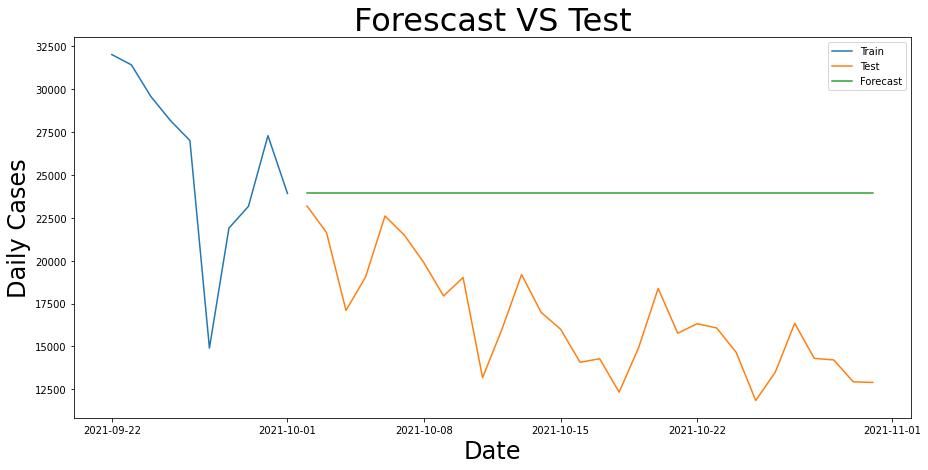

In [19]:
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(fcst_ses_pred_df,label='Forecast')
plt.legend(loc="best")
plt.title("Forescast VS Test",size=32)
plt.xlabel("Date",size=24)
plt.ylabel("Daily Cases",size=24)
plt.show()

* We can clearly see that the **simple exponential smoothing** is not
performing well as the Covid 19 data, which will means our **hypothesis is wrong**.
* So we can conclude that our data can some type of trend and seasonality
* Our basic model was not be able to capture these details.

## Double Exponential Smoothing

* **Double Exponential Smoothing** is an extension to **Simple Exponential Smoothing** that explicity adds support for trends in the univariate time series

* In addition to the **alpha parameter** for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called **beta.**

* The method supports trends that change in different ways:
    * an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

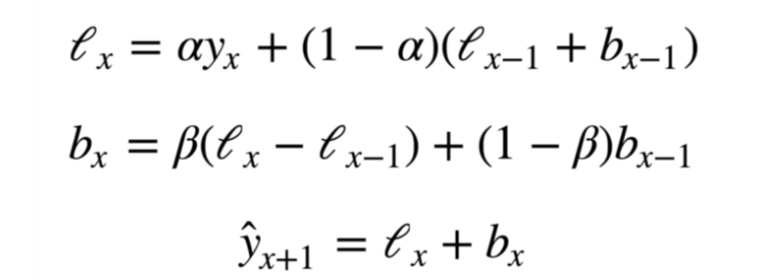

Here from the **formula** we have two components:
* **ℓ(level) :** intercept
* **b(slope) :** slope

* **The first function** one describes intercept,as it depends on the current value of the series, and the second term is now split into previous values of the level and of the trend.

* **The second function** describes trend as it depends on the level changes at the current step and on the pervious value of the trend.In this case β coefficient is a weight in the exponential smoothing.

* **The final prediction** is the sum of the model values of the intercept and the trend

So, from the above explanation we take our **hypothesis** as follows:

* We assume that our series has only **trend** and **no seasonality** component in it

### Double Exponential Smoothing algorithm's hyperparameters for reference:

* **Hyperparameters:**
    * **endog** (array-like): Time series
    * **exponential** (bool, optional): Type of trend
component

    * **damped_trend** (bool, optional): Whether the trend
component should be damped

*  About the **fit** parameters:
    * **smoothing_level** (float, optional): This is the **alpha**
value of the simple exponential smoothing. If the
value is set, then this setting will be used as the value.
    * **smoothing_trend** (float, optional): This is the **beta**
value of the Holt trend method. If the value is set,
then this setting will be used as the value.
    * **damping_trend** (float, optional): This is the **phi**
value of the damped method. If the value is set, then
this setting will be used as the value.
    * **Optimized** (bool, optional). This specifies whether
the values that have not been set be optimized
automatically.


In [20]:
param_grid = {
    'smoothing_level':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damping_trend':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damped_trend':[True,False]
}
pg = list(ParameterGrid(param_grid=param_grid))

Here in the **above code** we are defining a **range of parameters** for **smoothing_level,smoothing_trend,damping_trend** and **bool values** for the **damped_trend** and then are trying to find the best possible combination that yeilds least **RMSE and R2**

In [21]:
df_results_DES = pd.DataFrame(columns=['smoothing_level','smoothing_slope','damping_slope','damped','RMSE','r2'])

In [22]:
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_trend')
    damping_slope = b.get('damping_trend')
    damped = b.get('damped_trend')
    print(smoothing_level,smoothing_slope,damping_slope,damped)
    fit_o_f = Holt(train,damped_trend=damped).fit(smoothing_level=smoothing_level,
                                                  smoothing_trend=smoothing_slope,
                                                  damping_trend= damping_slope,
                                                  optimized=False)
    pred_o_f = fit_o_f.forecast(30)
    RMSE = np.sqrt(metrics.mean_squared_error(test,pred_o_f))
    r2 = metrics.r2_score(test,pred_o_f)
    print(f'RMSE is {RMSE}')
    df_results_DES = df_results_DES.append({
        'smoothing_level':smoothing_level,
        'smoothing_slope':smoothing_slope,
        'damping_slope':damping_slope,
        'damped':damped,
        'RMSE':RMSE,
        'r2':r2
    },ignore_index=True)
end = timer()
print("\n\n")
print(f'Total time taken to complete grid search in seconds: {(end-start)}')
print(f'Below mentioned parameter gives least RMSE and r2')
df_results_DES.sort_values(by=['RMSE','r2']).head(1)

0.1 0.1 0.1 True
RMSE is 11493.605147401682
0.1 0.2 0.1 True
RMSE is 11446.517512051409
0.1 0.3 0.1 True
RMSE is 11400.183605793443
0.1 0.4 0.1 True
RMSE is 11354.58789457236
0.1 0.5 0.1 True
RMSE is 11309.71540305357
0.1 0.6 0.1 True
RMSE is 11265.551670770421
0.1 0.7 0.1 True
RMSE is 11222.082713249143
0.1 0.8 0.1 True
RMSE is 11179.294987503905
0.1 0.9 0.1 True
RMSE is 11137.17536136937
0.2 0.1 0.1 True
RMSE is 9162.393066152383
0.2 0.2 0.1 True
RMSE is 9136.61188585285
0.2 0.3 0.1 True
RMSE is 9111.498371020969
0.2 0.4 0.1 True
RMSE is 9087.035138838117
0.2 0.5 0.1 True
RMSE is 9063.205447744658
0.2 0.6 0.1 True
RMSE is 9039.99316992632
0.2 0.7 0.1 True
RMSE is 9017.382764856091
0.2 0.8 0.1 True
RMSE is 8995.359253864397
0.2 0.9 0.1 True
RMSE is 8973.908195710148
0.3 0.1 0.1 True
RMSE is 8496.315897325796
0.3 0.2 0.1 True
RMSE is 8485.773248734438
0.3 0.3 0.1 True
RMSE is 8475.790999655312
0.3 0.4 0.1 True
RMSE is 8466.353737479969
0.3 0.5 0.1 True
RMSE is 8457.446489348595
0.3 0.6

,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
655,0.1,0.8,0.9,True,1889.823346,0.62166


In [29]:
print(f'Below mentioned parameter gives least RMSE and r2')
df_results_DES.sort_values(by=['RMSE','r2']).head(1)

Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
655,0.1,0.8,0.9,True,1889.823346,0.62166


In [30]:
fit_des = Holt(train,damped_trend=True).fit(
    smoothing_level=0.1,
    smoothing_trend=0.8,
    damping_trend = 0.9,
    optimized=False
)
forecast_des_pred = fit_des.forecast(30)
fit_des.summary()

Dep. Variable:,Daily Confirmed,No. Observations:,579
Model:,Holt,SSE,47518257864.851
Optimized:,False,AIC,10561.162
Trend:,Additive,BIC,10582.968
Seasonal:,None,AICC,10561.358
Seasonal Periods:,None,Date:,"Sun, 12 Dec 2021"
Box-Cox:,False,Time:,10:54:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.8000000,beta,False


In [31]:
timseries_evaluation_metrics_func(test,forecast_des_pred)

Evaluation metric results:-
MSE is : 3571432.2803879543
MAE is : 1523.0329558931028
RMSE is : 1889.8233463442964
MAPE is : 9.635046435892702
R2 is : 0.6216595787699599



Allowing the Double Exponential smoothing to find the **optimal parameters**

* **optimized** = True estimates model parameters by
maximizing the log likelihood.
* **use_brute** = True searches for good starting values
using a brute-force (grid) optimizer.


In [32]:
fitDESAUTO = Holt(train).fit(optimized=True,use_brute=True)
fitDESAUTO.summary()

C:\Users\amar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Daily Confirmed,No. Observations:,579
Model:,Holt,SSE,30968727427.477
Optimized:,True,AIC,10311.271
Trend:,Additive,BIC,10328.716
Seasonal:,None,AICC,10311.418
Seasonal Periods:,None,Date:,"Sun, 12 Dec 2021"
Box-Cox:,False,Time:,10:54:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0947619,beta,True


In [33]:
fitDESAUTOpred = fitDESAUTO.forecast(30)
timseries_evaluation_metrics_func(test,fitDESAUTOpred)

Evaluation metric results:-
MSE is : 6447227.973821046
MAE is : 1982.7394073050486
RMSE is : 2539.1392190703223
MAPE is : 12.95228813170121
R2 is : 0.3170115640225485



### Summary of the Best Double Exponential Smoothing Model through Hyperparameters and Optimized model

* **fit_des** model through hyperparameters
* **fitDESAUTO** model through auto optimization 

In [34]:
forecast_des_pred_df = pd.DataFrame(forecast_des_pred)
forecast_des_pred_df["index"] = test.index
forecast_des_pred_df.set_index("index",inplace=True)
fitDESAUTOpred_df = pd.DataFrame(fitDESAUTOpred)
fitDESAUTOpred_df["index"] = test.index
fitDESAUTOpred_df.set_index("index",inplace=True)

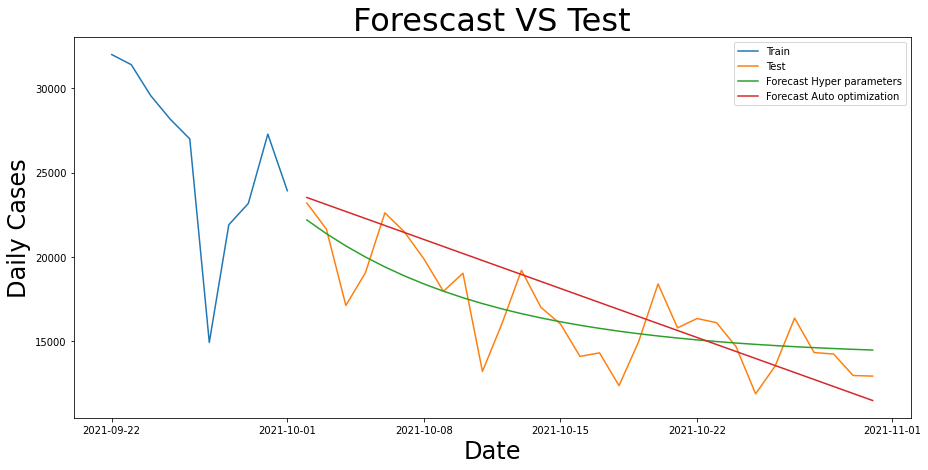

In [35]:
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_des_pred_df,label='Forecast Hyper parameters')
plt.plot(fitDESAUTOpred_df,label='Forecast Auto optimization')
plt.legend(loc="best")
plt.title("Forescast VS Test",size=32)
plt.xlabel("Date",size=24)
plt.ylabel("Daily Cases",size=24)
plt.show()

* From the evaluation of metrics and graph, we can see that the **double exponential smoothing** performed **significantly better than the simple exponential smoothing**

* From the graph we can see both **hyperparameter model** and **auto model** both were able to follow the trend.

* We can clearly see that the **double exponential smoothing** is not
performing well as the Covid 19 data, which will means our **hypothesis is wrong**.

* So we can conclude that our data can have some type of seasonality

* Our basic model was not be able to capture these details.

## Triple Exponential Smoothing

* Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

* In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

* As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

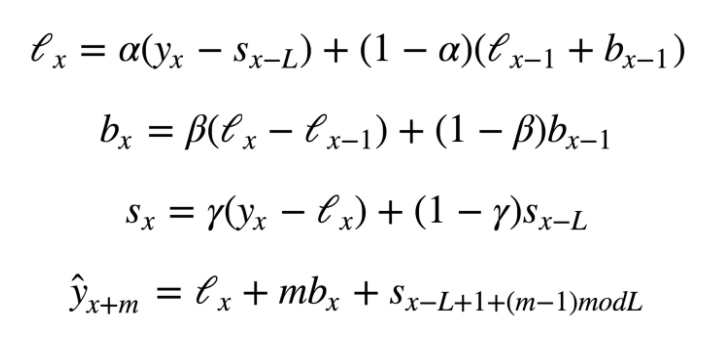

* **Intercept** now depends on the current value of the series minus corresponding seasonal component.
* **Trend** stays unchanged.
* **Seasonal** component depends on the current value of the series minus intercept and on the previous value of the component.

### Triple Exponential Smoothing algorithm's hyperparameters for reference:

* **Hyperparameters:**
    * **endog** (array-like): Time series
    * **trend** ({“add”, “mul”, “additive”, “multiplicative”,
None}, optional): Type of trend component
    * **damped_trend** (bool, optional): Whether the trend
component should be damped
    * **seasonal** ({“add”, “mul”, “additive”, “multiplicative”,
None}, optional): Type of seasonal component
    * **seasonal_periods** (int, optional): The number of
seasons to consider for Holt-Winters

*  About the **fit** parameters:
    
    * **smoothing_level** (float, optional): This is the **alpha**
value of the simple exponential smoothing. If the
value is set, then this setting will be used as the
value.
    * **smoothing_slope** (float, optional): This is the **beta**
value of the Holt trend method. If the value is set,
then this setting will be used as the value.
    * **smoothing_seasonal** (float, optional): This is the **gamma** value of the Holt-Winter seasonal method. If
the value is set, then this setting will be used as the
value.
    * **damping_slope** (float, optional): This is the **phi**
value of the damped method. If the value is set, then
this setting will be used as the value.
    * **optimized** (bool, optional): This specifies whether
the values that have not been set earlier should be
optimized automatically.


In [36]:
param_grid = {
    'trend':['add','mul'],
    'seasonal':['add','mul'],
    'seasonal_periods':[7,14],
    'smoothing_level':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'smoothing_slope':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damping_slope':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'damped_trend':[True,False],
}
pg = list(ParameterGrid(param_grid=param_grid))


Here in the **above code** we are defining a **range of parameteric** values then we are trying to find the best possible combination that yeilds least **RMSE and R2**

In [ ]:
"""
def model_func(train,test,b):
    trend = b.get("trend")
    seasonal = b.get("seasonal")
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level=b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped=b.get('damped')
    smoothing_seasonal = b.get('smoothing_seasonal')
    #use_boxcox = b.get('use_boxcox')
    #remove_bias = b.get('remove_bias')
    #use_basinhopping = b.get('use_basinhopping')
    RMSE,r2=0,0
    fitTES = ExponentialSmoothing(train,trend=trend,seasonal=seasonal,seasonal_periods=seasonal_periods,damped_trend=damped).fit(
        smoothing_level=smoothing_level,
        smoothing_slope=smoothing_slope,
        damping_slope=damping_slope,
        smoothing_seasonal = smoothing_seasonal,
        #use_boxcox=use_boxcox,
        optimized = False)
    fitTES_pred = fitTES.forecast(30)
    fitTES_pred.replace([np.inf,-np.inf],np.nan,inplace=True)
    fitTES_pred.dropna(inplace=True)
    if len(fitTES_pred) == len(test):    
        RMSE = np.sqrt(metrics.mean_squared_error(test,fitTES_pred))
        print(f'RMSE is {RMSE}')
        r2 = metrics.r2_score(test,fitTES_pred)
    else:
        RMSE = np.nan
        r2 = np.nan
    b['RMSE'] = RMSE
    b['r2'] = r2
    return b 
"""

* This the model function it returns **model parameters** and its **RMSE** and **R2** values

In [ ]:
"""
start = timer()
rest = []

with multiprocessing.Pool(processes=10) as pool:
    results = [pool.apply_async(model_func,args=(train,test,b)) for _,b in enumerate(pg)]
    
    for r in results:
        rest.append(r.get())
    #for a,b in enumerate(pg):
        #results.append(model_func(train,test,b))
end = timer()
print(f'Total time taken : {(end-start)}')
print(len(rest))
df_results_TES = pd.DataFrame(columns=['trend','seasonal','damped','seasonal_periods','smoothing_level',
                                       'smoothing_slope','smoothing_seasonal','damping_slope',
                                       'RMSE','r2'
                                       ])

for r in rest:
    count = count+1
    print(count)
    df_results_TES = df_results_TES.append(r,ignore_index=True)
df_results_TES.to_csv('model_parameters6.csv')

"""

* This the code for implementing using **multi processing** and storing results in a **data frame** and converting the **data frame** into a **csv file**

* The full code is present tripleExpoSmoothing.py for multiprocessing  

#### Getting Model Parameters Data

In [37]:
parameter_df = pd.read_csv("model_parameters6.csv",sep=",")
parameter_df.head()

,index,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
0,0,add,add,True,7,0.1,0.1,0.1,0.1,10788.677581,-11.330388
1,1,mul,add,True,7,0.1,0.1,0.1,0.1,10789.860738,-11.333093
2,2,add,add,True,7,0.1,0.2,0.1,0.1,10746.788504,-11.234824
3,3,mul,add,True,7,0.1,0.2,0.1,0.1,10749.012765,-11.239889
4,4,add,add,True,7,0.1,0.3,0.1,0.1,10705.482938,-11.140955


In [38]:
parameter_df.set_index('index',inplace=True)
parameter_df

,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
index,,,,,,,,,,
0,add,add,True,7,0.1,0.1,0.1,0.1,1.078868e+04,-1.133039e+01
1,mul,add,True,7,0.1,0.1,0.1,0.1,1.078986e+04,-1.133309e+01
2,add,add,True,7,0.1,0.2,0.1,0.1,1.074679e+04,-1.123482e+01
3,mul,add,True,7,0.1,0.2,0.1,0.1,1.074901e+04,-1.123989e+01
4,add,add,True,7,0.1,0.3,0.1,0.1,1.070548e+04,-1.114096e+01
...,...,...,...,...,...,...,...,...,...,...
104971,mul,mul,False,14,0.9,0.7,0.9,0.9,inf,-inf
104972,add,mul,False,14,0.9,0.8,0.9,0.9,2.793043e+06,-8.264088e+05
104973,mul,mul,False,14,0.9,0.8,0.9,0.9,NaN,NaN


In [39]:
parameter_df.shape

(104976, 10)

In [40]:
parameter_df.isna().sum()

trend                    0
seasonal                 0
damped                   0
seasonal_periods         0
smoothing_level          0
smoothing_slope          0
smoothing_seasonal       0
damping_slope            0
RMSE                  9172
r2                    9172
dtype: int64

In [41]:
parameter_df.dropna(inplace=True)

Droping **Nan** value rows from the **dataframe**

In [42]:
parameter_df.isna().sum()

trend                 0
seasonal              0
damped                0
seasonal_periods      0
smoothing_level       0
smoothing_slope       0
smoothing_seasonal    0
damping_slope         0
RMSE                  0
r2                    0
dtype: int64

In [43]:
parameter_df.shape

(95804, 10)

In [44]:
parameter_df.sort_values(by=['RMSE','r2']).head(10)

,trend,seasonal,damped,seasonal_periods,smoothing_level,smoothing_slope,smoothing_seasonal,damping_slope,RMSE,r2
index,,,,,,,,,,
51042,add,mul,True,14,0.1,0.7,0.1,0.9,1104.854716,0.870684
49584,add,mul,True,7,0.1,0.7,0.1,0.9,1127.529888,0.865322
51058,add,mul,True,14,0.1,0.6,0.2,0.9,1181.704624,0.852069
55895,mul,mul,False,7,0.4,0.3,0.1,0.1,1197.076052,0.848196
61727,mul,mul,False,7,0.4,0.3,0.1,0.2,1197.076052,0.848196
67559,mul,mul,False,7,0.4,0.3,0.1,0.3,1197.076052,0.848196
73391,mul,mul,False,7,0.4,0.3,0.1,0.4,1197.076052,0.848196
79223,mul,mul,False,7,0.4,0.3,0.1,0.5,1197.076052,0.848196
85055,mul,mul,False,7,0.4,0.3,0.1,0.6,1197.076052,0.848196


#### Best Best Triple Exponential Smoothing Model through Hyperparameters and Summary

In [45]:
fit1 = ExponentialSmoothing(train,trend="add",seasonal="mul",damped_trend=True,
                            seasonal_periods=14).fit(
                                smoothing_level=0.1,
                                smoothing_trend=0.7,
                                smoothing_seasonal=0.1,
                                damping_trend=0.9,
                                optimized = False
                            )

In [46]:
forecast_custom_pred1 = fit1.forecast(30)
fit1.summary()

Dep. Variable:,Daily Confirmed,No. Observations:,579
Model:,ExponentialSmoothing,SSE,42309300814.361
Optimized:,False,AIC,10521.936
Trend:,Additive,BIC,10604.801
Seasonal:,Multiplicative,AICC,10523.595
Seasonal Periods:,14,Date:,"Sun, 12 Dec 2021"
Box-Cox:,False,Time:,10:55:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.7000000,beta,False


In [47]:
timseries_evaluation_metrics_func(test,forecast_custom_pred1)

Evaluation metric results:-
MSE is : 1220703.9433475954
MAE is : 866.6875143439055
RMSE is : 1104.8547159457642
MAPE is : 5.129779771663942
R2 is : 0.8706844739407654



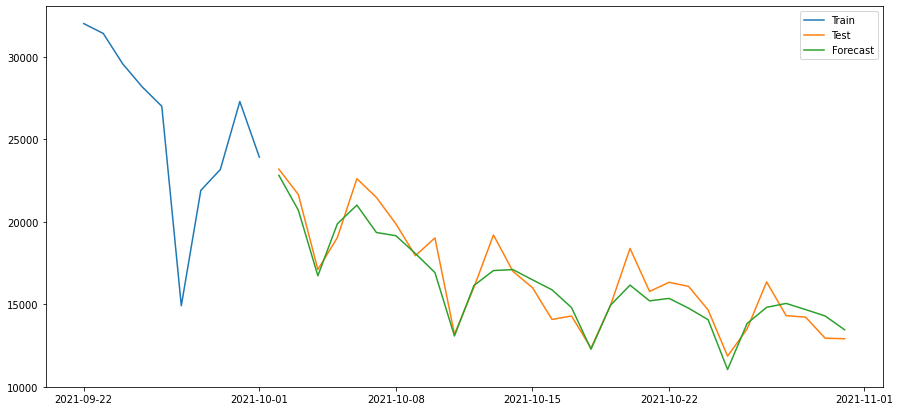

In [48]:
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_custom_pred1,label='Forecast')
plt.legend(loc="best")
plt.show()

#### Second Best Model for Triple Exponential Smoothing and Summary

In [49]:
fit2 = ExponentialSmoothing(train,trend="add",seasonal="mul",damped_trend=True,
                            seasonal_periods=7).fit(
                                smoothing_level=0.1,
                                smoothing_trend=0.7,
                                smoothing_seasonal=0.1,
                                damping_trend=0.9,
                                optimized = False
                            )
forecast_custom_pred2 = fit2.forecast(30)
fit2.summary()

Dep. Variable:,Daily Confirmed,No. Observations:,579
Model:,ExponentialSmoothing,SSE,37622260454.630
Optimized:,False,AIC,10439.955
Trend:,Additive,BIC,10492.290
Seasonal:,Multiplicative,AICC,10440.699
Seasonal Periods:,7,Date:,"Sun, 12 Dec 2021"
Box-Cox:,False,Time:,10:55:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.7000000,beta,False


In [50]:
timseries_evaluation_metrics_func(test,forecast_custom_pred2)

Evaluation metric results:-
MSE is : 1271323.6482523542
MAE is : 923.6846609570825
RMSE is : 1127.5298879641082
MAPE is : 5.556385866287469
R2 is : 0.8653220649763355



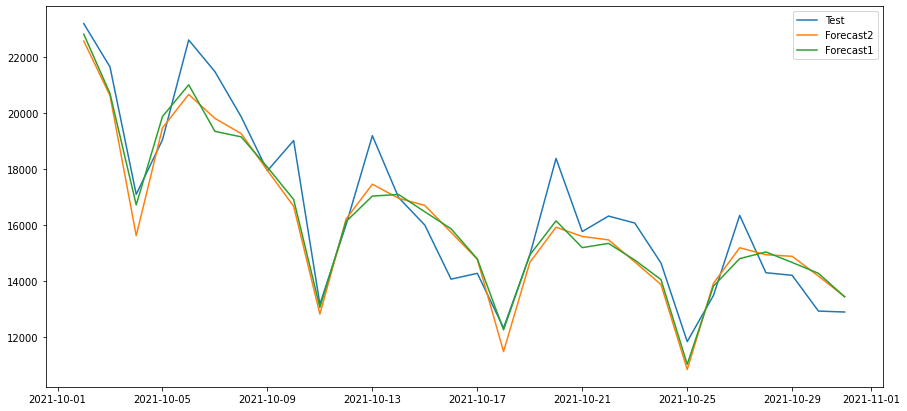

In [51]:
plt.rcParams["figure.figsize"] = [15,7]
#plt.plot(train[-10:],label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_custom_pred2,label='Forecast2')
plt.plot(forecast_custom_pred1,label='Forecast1')
plt.legend(loc="best")
plt.show()